In [1]:
import pandas as pd 
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from livelossplot import PlotLossesKeras


In [2]:
img_data = glob('Data/breast-histopathology-images - Copy/**/*.png', recursive=True)

In [3]:
img_data[:3]

['Data/breast-histopathology-images - Copy\\15902\\0\\15902_idx5_x1001_y1201_class0.png',
 'Data/breast-histopathology-images - Copy\\15902\\0\\15902_idx5_x1001_y1801_class0.png',
 'Data/breast-histopathology-images - Copy\\15902\\0\\15902_idx5_x1001_y1851_class0.png']

In [4]:
#images with cancer ends with {0.png} and images without cancer ends with {1.png}
cancer_img = []
no_cancer_img = []

for i in img_data:
    if   i[-5] == '1': 
        no_cancer_img.append(i)
    elif i[-5] == '0':
        cancer_img.append(i)

In [5]:
#count the number of cancer images and non cancer images 

count_cancer_image = len(cancer_img)
count_no_cancer_image = len(no_cancer_img)

total_images = count_cancer_image + count_no_cancer_image

cancer_percentage = (count_cancer_image / total_images) * 100
no_cancer_percentage = (count_no_cancer_image / total_images) * 100

print(f"Number of cancer images: {count_cancer_image} (Percentage: {round(cancer_percentage, 2)}%)")
print(f"Number of non-cancer images: {count_no_cancer_image} (Percentage: {round(no_cancer_percentage, 2)}%)")
print("Total images:", total_images)

Number of cancer images: 8647 (Percentage: 66.15%)
Number of non-cancer images: 4425 (Percentage: 33.85%)
Total images: 13072


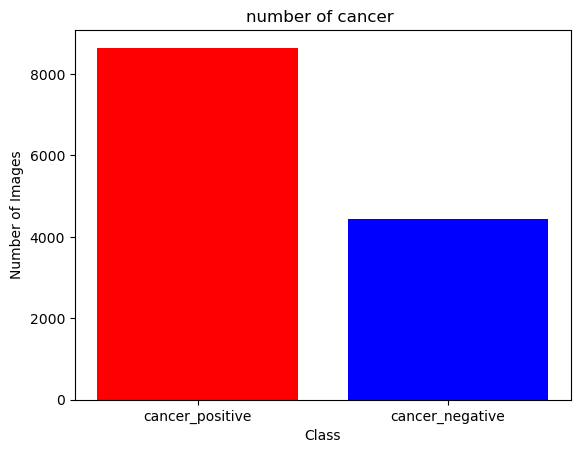

In [6]:
#make visualizations 
#Barchart 
labels = ['cancer_positive', 'cancer_negative']
values = [count_cancer_image, count_no_cancer_image]
plt.bar(labels, values, color=['red', 'blue'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('number of cancer ')
plt.show()

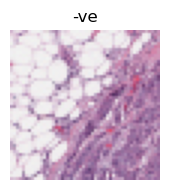

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Create a single plot to show the cancer negative image

img = image.load_img(no_cancer_img[2], target_size=(50, 50)) #load image #3 and make the resolution of the image 100*100
img = image.img_to_array(img)

# Create a single plot to show the non-cancer image
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.title('-ve')
plt.imshow(img.astype('uint8'))  # Use plt.imshow instead of plt.imgshow
plt.tight_layout()
plt.show()

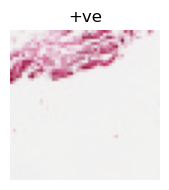

In [8]:
# Create a single plot to show the cancer positive image

img = image.load_img(cancer_img[2], target_size=(50, 50)) #load image #3 and make the resolution of the image 100*100
img = image.img_to_array(img)

plt.figure(figsize=(2, 2))
plt.axis('off')
plt.title('+ve')
plt.imshow(img.astype('uint8'))  
plt.tight_layout()
plt.show()

In [9]:
import cv2
import random

#shuffle images for reducing bias, creating randomization and reduce patterns 
random.shuffle(no_cancer_img)
random.shuffle(cancer_img)

image_size = (50, 50)

non_img_arr = []
for img_path in no_cancer_img:
    n_img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, image_size, interpolation=cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
can_img_arr = []
for img_path in cancer_img:
    c_img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, image_size, interpolation=cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [10]:

breast_img_arr = non_img_arr[:2000] + can_img_arr[:2000]

np.random.shuffle(breast_img_arr) #shuffle for more randomization

X = np.array([item[0] for item in breast_img_arr])
y = np.array([item[1] for item in breast_img_arr])

In [11]:
X

array([[[[150, 104, 156],
         [136,  88, 157],
         [133,  97, 164],
         ...,
         [133,  85, 125],
         [160, 114, 172],
         [148, 105, 169]],

        [[122,  71, 130],
         [183, 161, 197],
         [228, 223, 231],
         ...,
         [127,  78, 125],
         [151, 108, 162],
         [137,  84, 138]],

        [[211, 206, 220],
         [236, 232, 234],
         [234, 233, 238],
         ...,
         [133,  86, 139],
         [135,  84, 138],
         [135,  88, 141]],

        ...,

        [[235, 232, 237],
         [236, 232, 234],
         [237, 234, 236],
         ...,
         [181, 147, 182],
         [154, 106, 163],
         [150, 104, 156]],

        [[236, 234, 235],
         [235, 233, 236],
         [237, 233, 234],
         ...,
         [159, 115, 172],
         [145, 100, 163],
         [148, 102, 166]],

        [[236, 231, 235],
         [236, 231, 235],
         [237, 235, 239],
         ...,
         [129,  84, 135],
        

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 


In [21]:

model = Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics = ['Accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 64)        4864      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 256)       

In [22]:


lr_decay = tf.keras.callbacks.ReduceLROnPlateau(monitor='Accuracy', 
                                 patience=3, verbose=1, 
                                 factor=0.9, min_lr=1e-8)

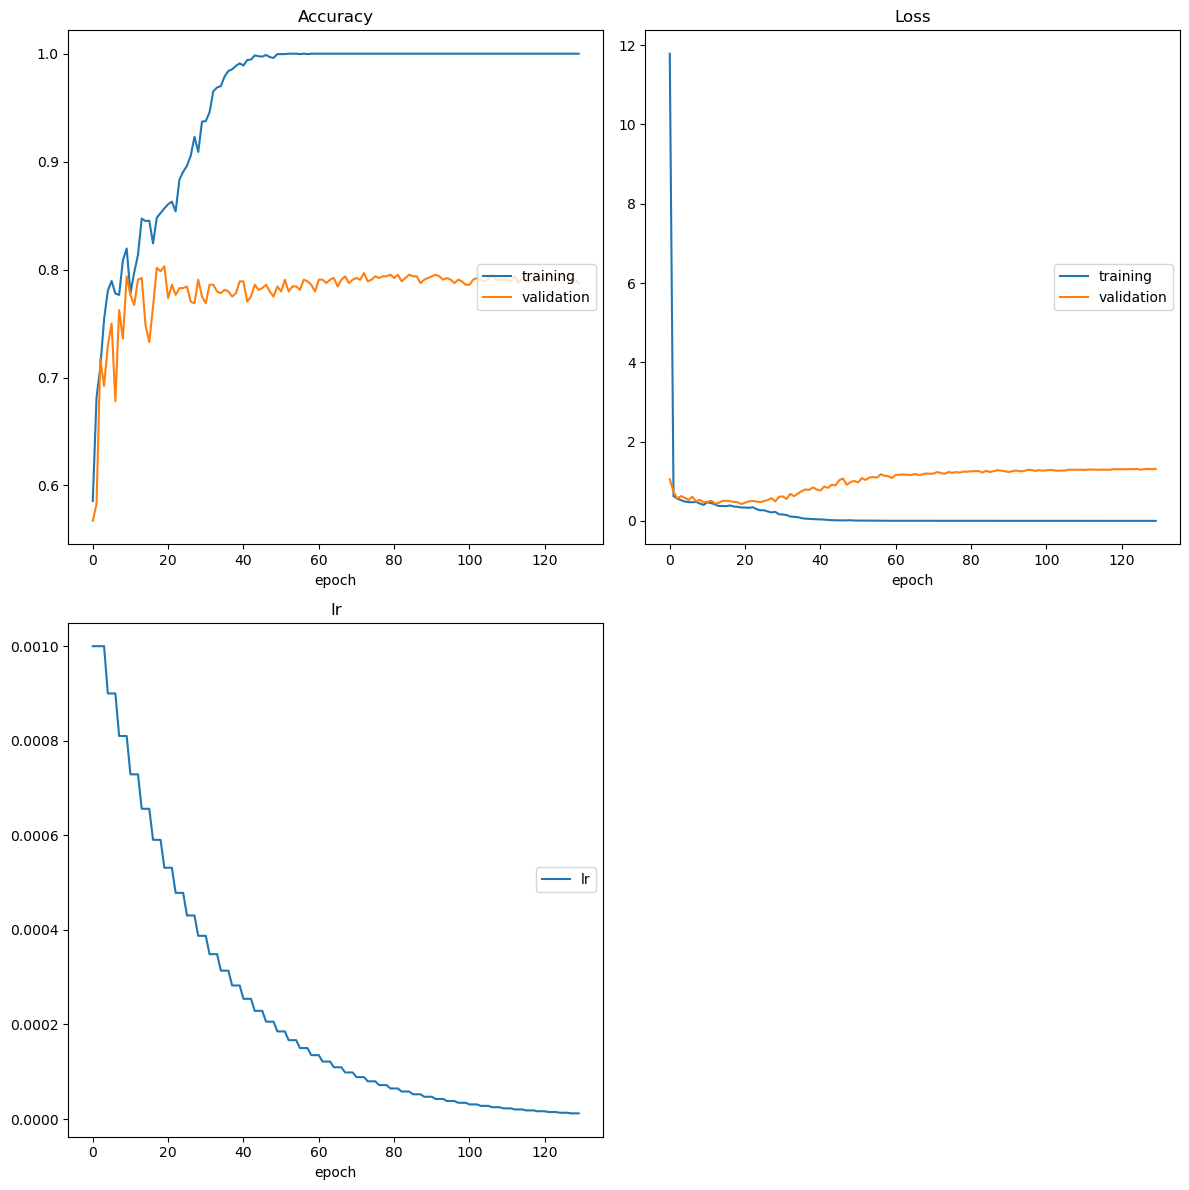

Accuracy
	training         	 (min:    0.586, max:    1.000, cur:    1.000)
	validation       	 (min:    0.567, max:    0.803, cur:    0.788)
Loss
	training         	 (min:    0.001, max:   11.785, cur:    0.001)
	validation       	 (min:    0.424, max:    1.314, cur:    1.314)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
35/35 [==============================] - 4s 121ms/step - loss: 6.1617e-04 - Accuracy: 1.0000 - val_loss: 1.3142 - val_Accuracy: 0.7875 - lr: 1.1973e-05


In [23]:
history = model.fit(X_train, y_train, 
                    validation_split= 0.2,
                    epochs = 130,
                    batch_size = 75, 
                    callbacks = [lr_decay, PlotLossesKeras()],
                    shuffle = True
                    )


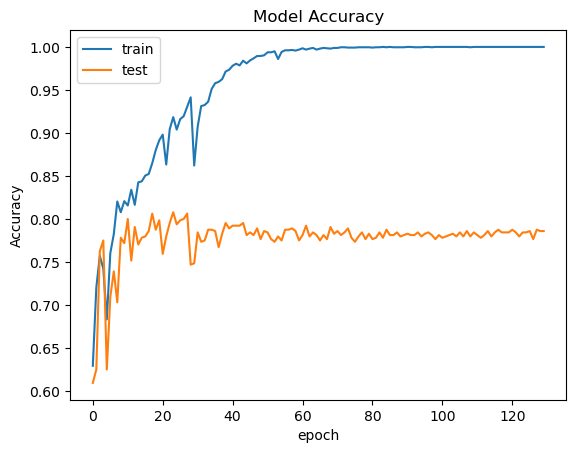

In [20]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


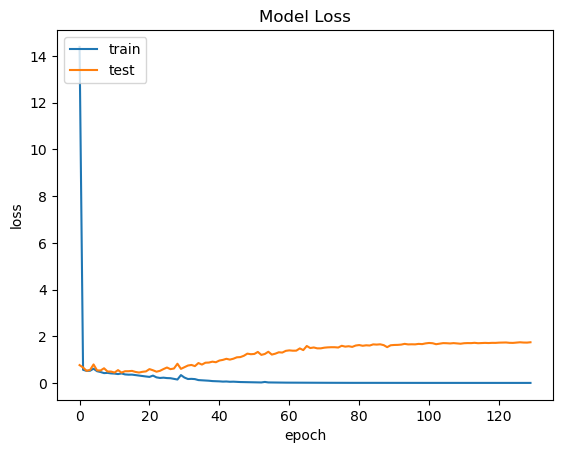

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
model.evaluate(X_test,y_test)


   6/3470 [..............................] - ETA: 1:18 - loss: 0.5430 - accuracy: 0.7760

3470/3470 [==============================] - 70s 20ms/step - loss: 0.5975 - accuracy: 0.7152


[0.5975204110145569, 0.7151697874069214]

3470/3470 [==============================] - 71s 20ms/step


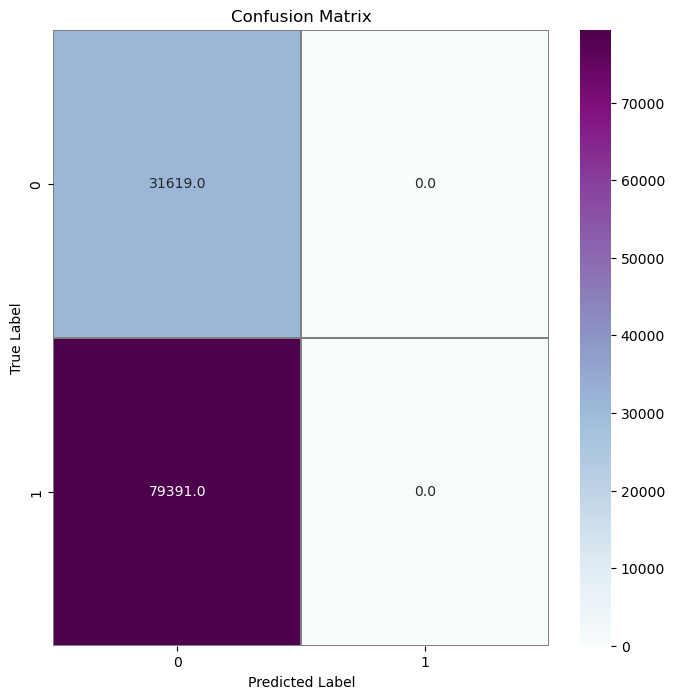

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.array(y_test)

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
prediction = model.predict(X_test)


3470/3470 [==============================] - 69s 20ms/step


In [ ]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])


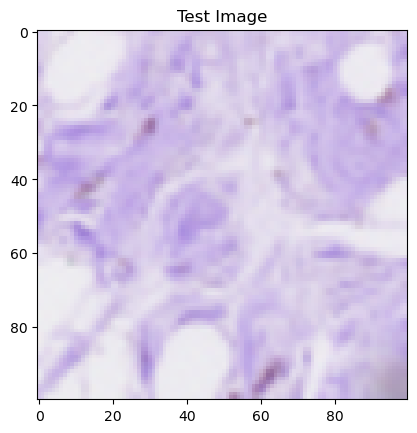

In [ ]:
index = 100
img_plot(X_test, index)